# Análise do Data Warehouse - (Cursos Superior, Cor/Raça, Brasil)

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

In [5]:
table = 'fato_aluno_cor'
field = 'cor_raca'
curse_types = ['Bacharelado','Licenciatura','Tecnologia']
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes'],
    'unidade_ensino': '',
    'instituicao': 'IFPB',
}

In [6]:
s = []
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,
                ','.join(map(str,["'{}'".format(i) for i in v]))))
filter_sql = " AND ".join(map(str,s))

In [7]:
# Análise de Sexo
sql = "SELECT categoria_situacao, {0}, tipo_curso, instituicao, unidade_ensino, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY categoria_situacao, {0}, tipo_curso, instituicao " \
" ALLOW FILTERING;".format(
    field, 
    table,
    filter_sql)
rslt = session.execute(sql, timeout=None)
df = rslt._current_rows
df

,categoria_situacao,cor_raca,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,Amarela,Bacharelado,IFPB,Campus João Pessoa,3
1,Concluintes,Amarela,Licenciatura,IFPB,Campus João Pessoa,3
2,Concluintes,Amarela,Qualificação Profissional (FIC),IFPB,Campus Avançado Pedras de Fogo,15
3,Concluintes,Amarela,Tecnologia,IFPB,Campus Cabedelo,13
4,Concluintes,Amarela,Técnico,IFPB,Campus Avançado Cabedelo Centro,44
...,...,...,...,...,...,...
81,Evadidos,Preta,Especialização (Lato Sensu),IFPB,Campus João Pessoa,4
82,Evadidos,Preta,Licenciatura,IFPB,Campus Cabedelo,68
83,Evadidos,Preta,Qualificação Profissional (FIC),IFPB,Campus Avançado Areia,42
84,Evadidos,Preta,Tecnologia,IFPB,Campus Cabedelo,119


## Filtrando Tipo do Curso

In [8]:
if curse_types :
    df = df[df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
df

Fitrando pelos tipos de cursos:
 Bacharelado, Licenciatura, Tecnologia


,categoria_situacao,cor_raca,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,Amarela,Bacharelado,IFPB,Campus João Pessoa,3
1,Concluintes,Amarela,Licenciatura,IFPB,Campus João Pessoa,3
3,Concluintes,Amarela,Tecnologia,IFPB,Campus Cabedelo,13
5,Concluintes,Branca,Bacharelado,IFPB,Campus Cajazeiras,85
7,Concluintes,Branca,Licenciatura,IFPB,Campus Cajazeiras,73
10,Concluintes,Branca,Tecnologia,IFPB,Campus Cabedelo,274
13,Concluintes,Indígena,Tecnologia,IFPB,Campus Monteiro,1
15,Concluintes,Não Declarada,Bacharelado,IFPB,Campus João Pessoa,20
17,Concluintes,Não Declarada,Licenciatura,IFPB,Campus Cajazeiras,31
20,Concluintes,Não Declarada,Tecnologia,IFPB,Campus Cabedelo,93


## Agrupando

In [9]:
df = df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()

<AxesSubplot:xlabel='cor_raca'>

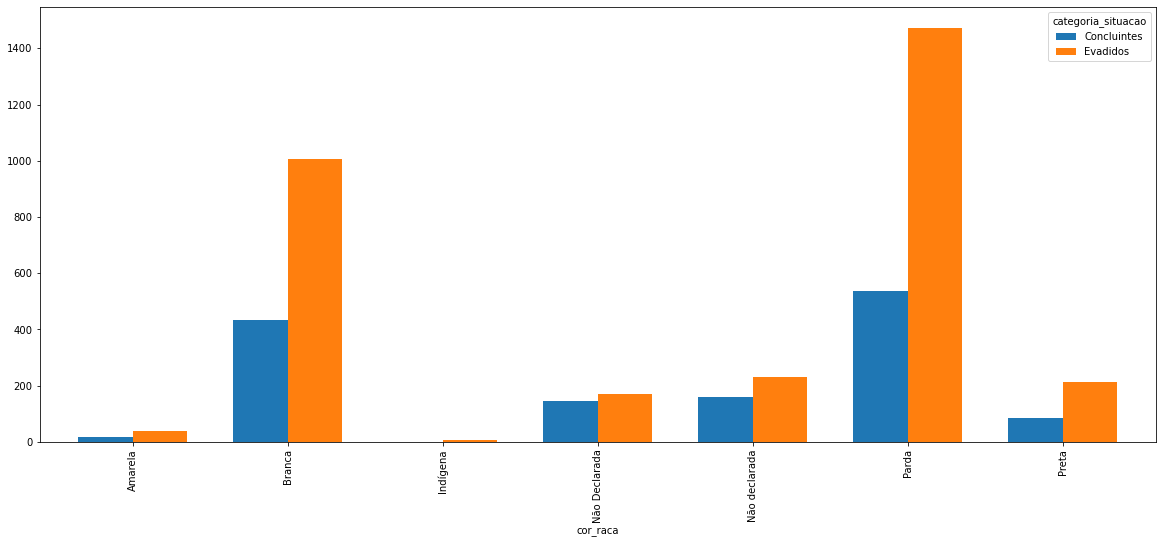

In [10]:
x = df.pivot_table('quant_grupo',[field],'categoria_situacao')
#x = df.pivot_table('quant_grupo',['categoria_situacao'],field)
x.plot(kind ='bar', figsize=(20, 8), width = 0.7)

## Total de Alunos

In [11]:
#df[field]
df.groupby([field]).sum('quant_grupo')['quant_grupo']

cor_raca
Amarela            57
Branca           1438
Indígena            8
Não Declarada     315
Não declarada     388
Parda            2011
Preta             297
Name: quant_grupo, dtype: int64

In [12]:
print("Total de aluns: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de aluns: 4.514
